In [3]:
%matplotlib inline 
import cv2
import skimage
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from pathlib import Path
import tqdm

In [4]:
def read_image(img_path):
    img_bgr = cv2.imread(str(img_path))
    img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    return img

# hash

In [5]:
import imagehash

In [6]:
def hash(img):
    return imagehash.average_hash(img)

# calculate hashes

In [8]:
images_dir = Path('/Users/yzh/Desktop/infovis/true/images')
def is_image(image_path):
    p = str(image_path).lower()
    return p.endswith('jpg') or p.endswith('.png')
images_path = list(filter(is_image, images_dir.iterdir()))
len(images_path)

8148

In [9]:
def get_hash(image_path):
    img2 = read_image(image_path)
    return hash(Image.fromarray(img2))

In [10]:
hashes = [get_hash(str(image_path)) for image_path in tqdm.tqdm(images_path)]

100%|██████████| 8148/8148 [06:53<00:00, 19.69it/s]


# get closest

In [11]:
def show_result(img1, img2, diffs):
    fig = plt.figure(figsize=(8, 8))
    fig.add_subplot(2, 2, 1)
    plt.imshow(img1)
    plt.title('input')
    fig.add_subplot(2, 2, 2)
    plt.imshow(img2)
    plt.title('closest')
    fig.add_subplot(2, 1, 2)
    plt.hist(diffs, bins=np.arange(0, 50, 1))
    plt.title('distance distribution')
    plt.show()

In [69]:
def show_closest(img1_path):
    # read input image and calculate hash
    img1 = read_image(img1_path)
    hash1 = hash(Image.fromarray(img1))
    # calculate differences of hashes as distance
    diffs = [(hash2 - hash1) for hash2 in hashes]
    print("smallest 9 diff values")
    print(sorted(diffs)[:20])
    # find closest
    img2 = read_image(images_path[np.argmin(diffs)])
             
    # display result
    show_result(img1, img2, diffs)
    
    #2nd - 9th most similiar 
    for i in range(2, 10):
      plt.imshow(read_image(images_path[ np.argsort(diffs)[i-1] ]))
      plt.show()

# for some images, we can not find exact ones until we go to 9th closest.


## for 5/8 images, we can find cloest

## for 2/8 images, we can find until we go to 9th closest

## for 1/8 images, we cannot find even we go through 9 closest
### not in database?

# from sorted diff values printed, we can see this method is reliable

smallest 20 diff values
[5, 6, 6, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9]


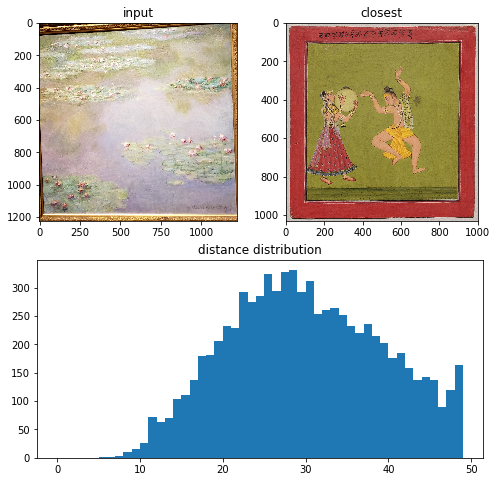

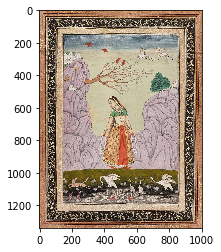

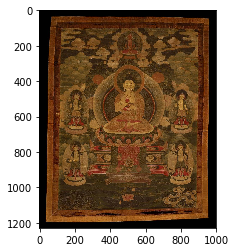

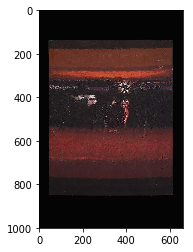

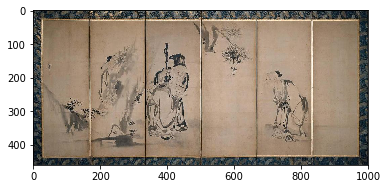

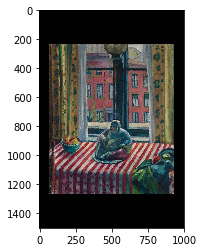

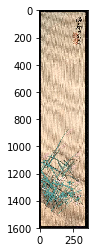

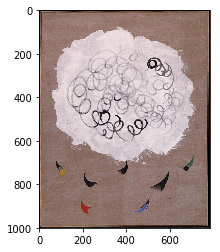

In [53]:
show_closest('/Users/yzh/Desktop/infovis/lily photo.jpg')

smallest 20 diff values
[8, 12, 13, 13, 13, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16]


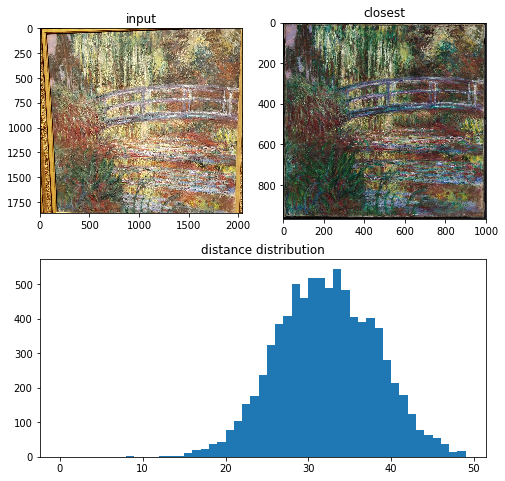

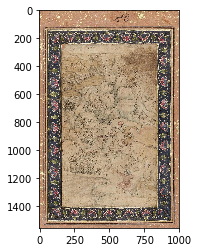

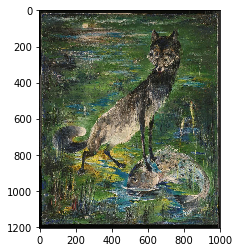

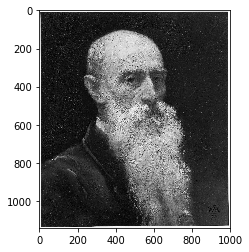

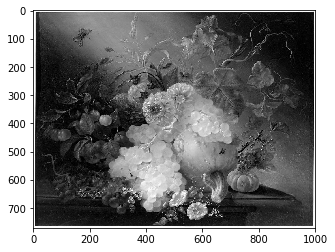

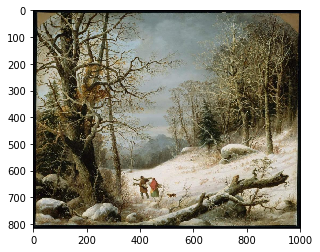

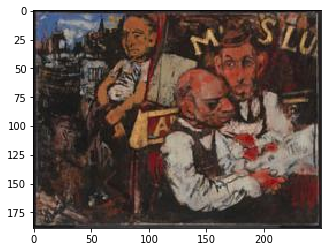

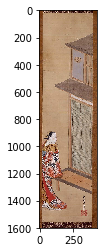

In [55]:
show_closest('/Users/yzh/Desktop/infovis/20190925_163234.jpg')

smallest 20 diff values
[4, 5, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9]


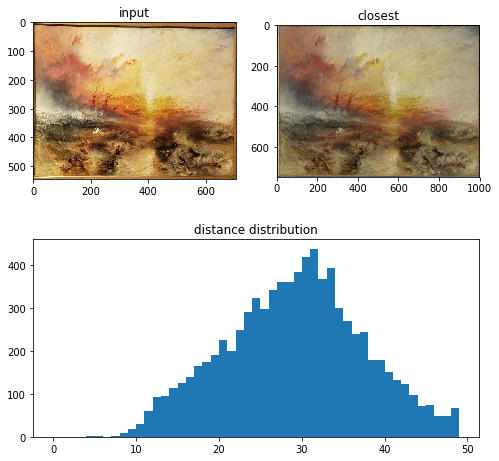

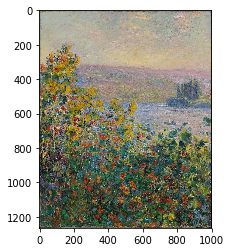

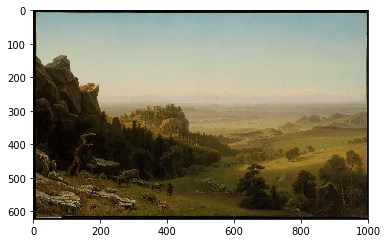

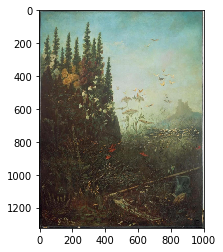

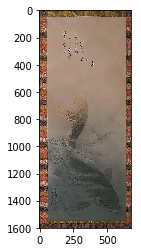

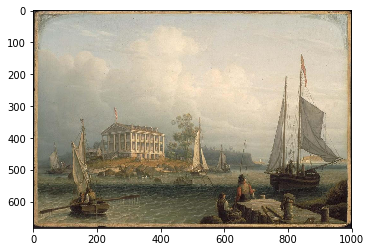

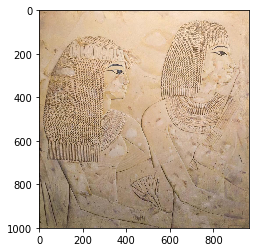

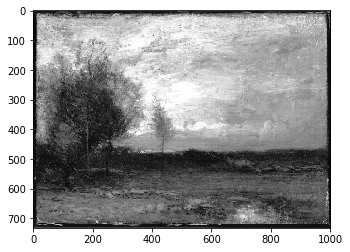

In [57]:
show_closest('/Users/yzh/Desktop/infovis/Screen Shot 2019-10-17 at 3.03.11 PM.png')

smallest 20 diff values
[5, 13, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17]


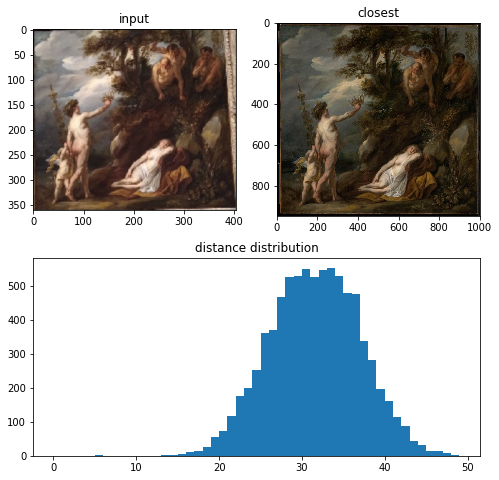

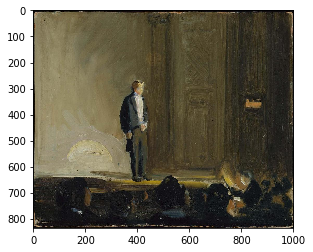

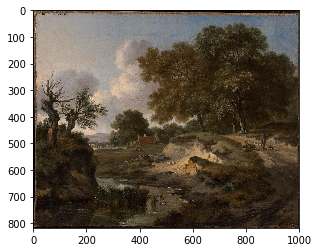

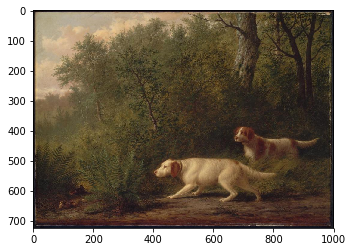

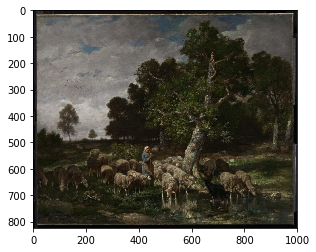

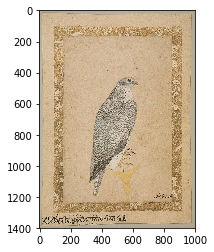

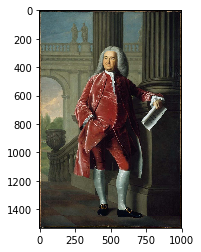

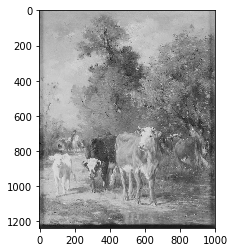

In [58]:
show_closest('/Users/yzh/Desktop/infovis/Screen Shot 2019-10-17 at 2.54.56 PM.png')

smallest 20 diff values
[3, 7, 7, 8, 9, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12]


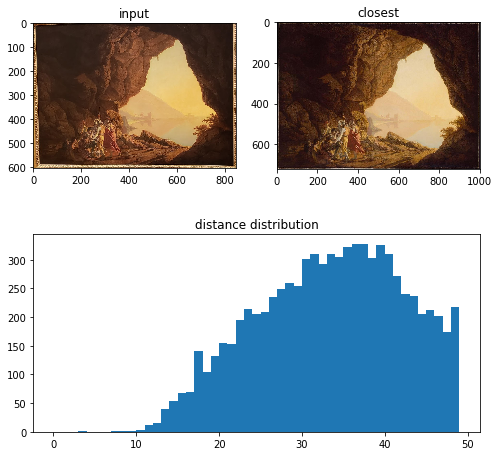

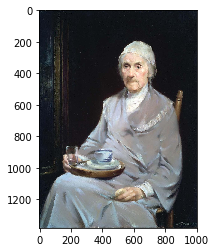

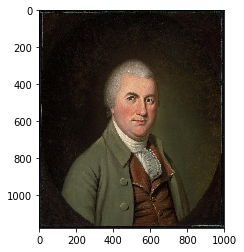

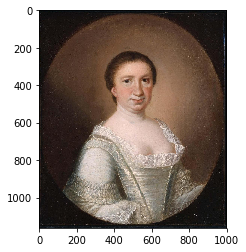

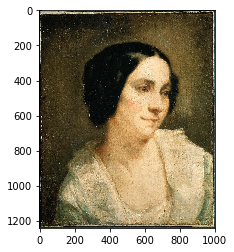

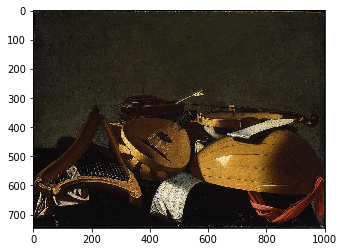

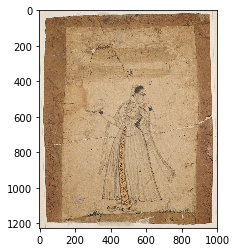

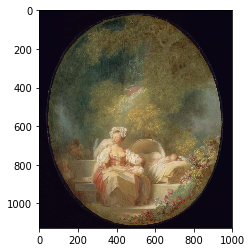

In [59]:
show_closest('/Users/yzh/Desktop/infovis/Screen Shot 2019-10-17 at 3.04.49 PM.png')

smallest 9 diff values
[6, 7, 7, 8, 8, 8, 8, 8, 9, 9, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11]


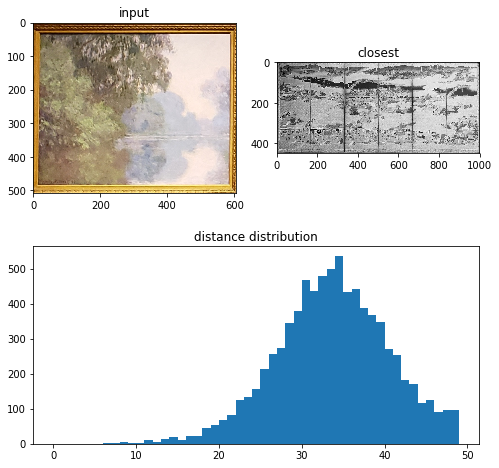

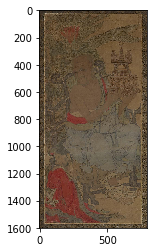

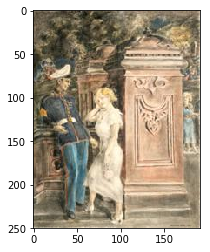

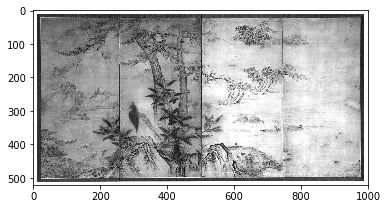

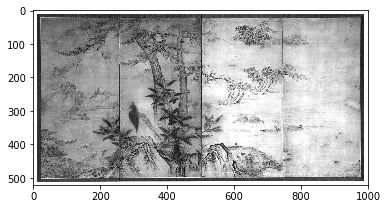

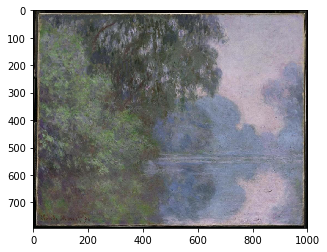

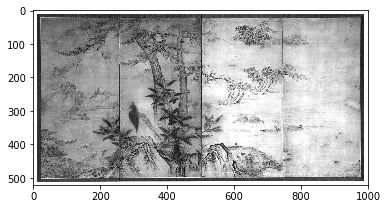

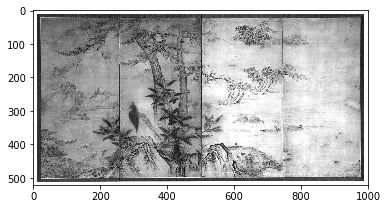

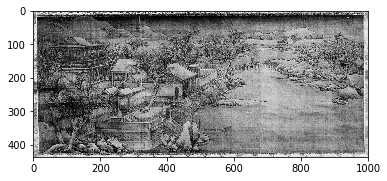

In [70]:
show_closest("/Users/yzh/Desktop/infovis/20190925_163120.jpg")

smallest 20 diff values
[9, 14, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]


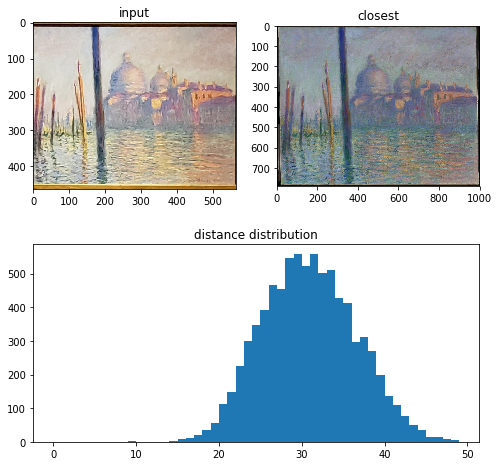

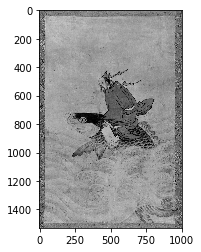

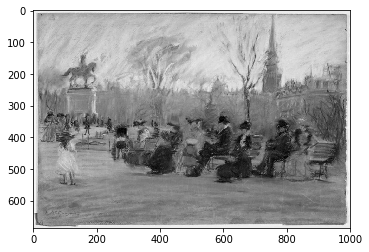

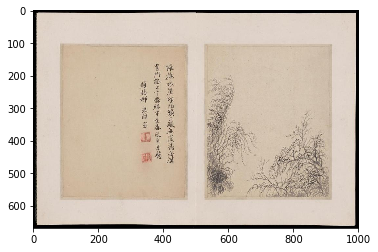

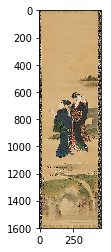

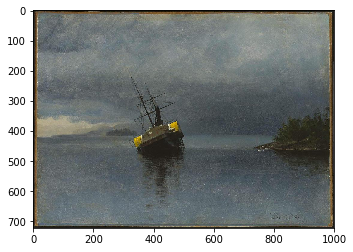

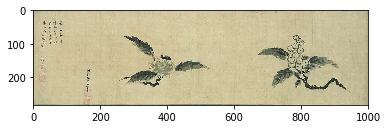

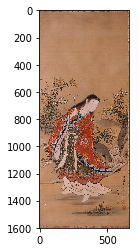

In [61]:
show_closest("/Users/yzh/Desktop/infovis/20190925_163120 (1).jpg")

smallest 20 diff values
[2, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]


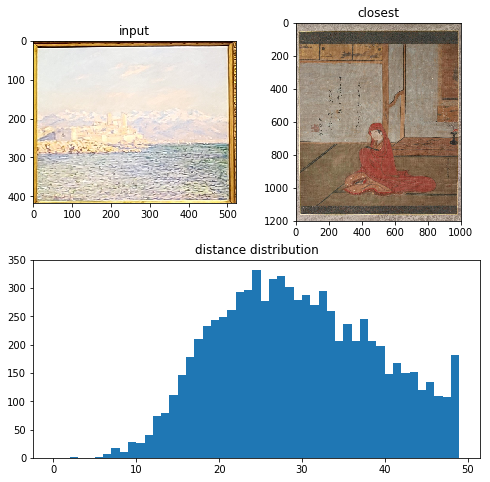

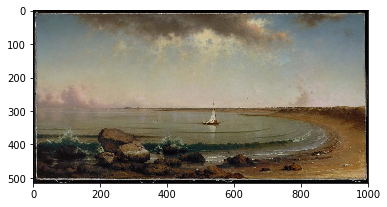

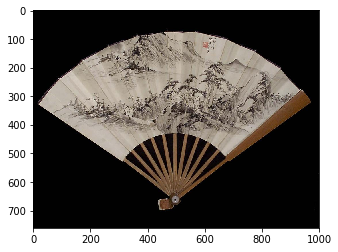

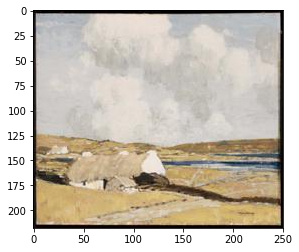

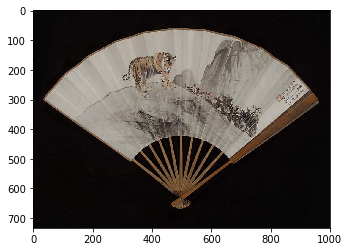

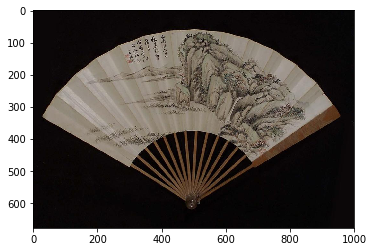

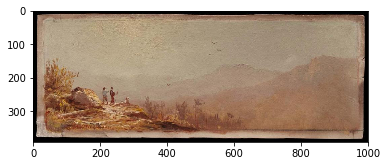

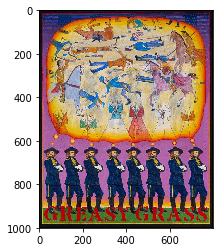

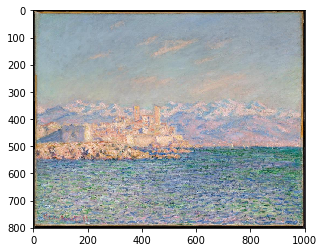

In [68]:
show_closest("/Users/yzh/Desktop/infovis/20190925_163120 (2).jpg")